In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import KFold
import os
import seaborn as sns

In [2]:
DAY_NIGHT_DATASET_PATH = "/Users/rsurridge/math-for-ml/Solar-ML-Forecast/datasets/hourly_day_and_night_weather.csv"
DAY_DATASET_PATH = "/Users/rsurridge/math-for-ml/Solar-ML-Forecast/datasets/hourly_day_only_weather.csv"

day_night_solar_df = pd.read_csv(DAY_NIGHT_DATASET_PATH, sep=",", index_col=0)
day_night_solar_df = day_night_solar_df.iloc[:, :10]
print(day_night_solar_df.head())

X_day_night = day_night_solar_df.iloc[:, :-1].values
y_day_night = day_night_solar_df.iloc[:, -1].values

day_solar_df = pd.read_csv(DAY_DATASET_PATH, sep=",", index_col=1)
day_solar_df = day_solar_df.iloc[:, 1:]
day_solar_df = day_solar_df.iloc[:, :10]
print(day_solar_df.head())

X_day = day_solar_df.iloc[:, :-1].values
y_day = day_solar_df.iloc[:, -1].values

         Hour  Cloud coverage  Visibility  Temperature  Dew point   
Date                                                                
1/31/16    24             0.0        5.00         1.40       0.89  \
2/1/16      1             0.0        7.88         1.16       0.62   
2/1/16      2             0.0        9.84         1.22       0.96   
2/1/16      3             0.0        9.84         1.02       0.61   
2/1/16      4             0.0        9.88         0.83       0.45   

         Relative humidity  Wind speed  Station pressure  Altimeter   
Date                                                                  
1/31/16              95.56        9.00             29.10      29.89  \
2/1/16               91.04        7.04             29.11      29.90   
2/1/16               89.28        8.96             29.12      29.91   
2/1/16               89.12        6.36             29.14      29.93   
2/1/16               90.08        6.12             29.15      29.94   

         Solar ene

In [15]:
save_dir = 'neural_network_plots'
os.makedirs(save_dir, exist_ok=True)

kf = KFold(n_splits=5, shuffle=True)

# Day and Night Dataset
feature_importance_day_night = np.zeros((5, X_day_night.shape[1]))

for fold, (train_index, val_index) in enumerate(kf.split(X_day_night, y_day_night)):
    X_train_fold, X_val_fold = X_day_night[train_index], X_day_night[val_index]
    y_train_fold, y_val_fold = y_day_night[train_index], y_day_night[val_index]

    mlp_model = MLPRegressor(hidden_layer_sizes=(64, 64), max_iter=100, random_state=42)
    mlp_model.fit(X_train_fold, y_train_fold)

    feature_importance_day_night[fold, :] = mlp_model.coefs_[0].sum(axis=1)

feature_names_day_night = day_night_solar_df.columns[:9].tolist()

# Day Only Dataset
feature_importance_day_only = np.zeros((5, X_day.shape[1]))

for fold, (train_index, val_index) in enumerate(kf.split(X_day, y_day)):
    X_train_fold, X_val_fold = X_day[train_index], X_day[val_index]
    y_train_fold, y_val_fold = y_day[train_index], y_day[val_index]

    mlp_model = MLPRegressor(hidden_layer_sizes=(64, 64), max_iter=100, random_state=42)
    mlp_model.fit(X_train_fold, y_train_fold)

    feature_importance_day_only[fold, :] = mlp_model.coefs_[0].sum(axis=1)

feature_names_day_only = day_solar_df.columns[:9].tolist()


/opt/homebrew/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/neural_network/_multi

In [13]:
max_iter_lst = [50, 100, 150, 200]

feature_importance_matrix_day_night = np.zeros((len(max_iter_lst), X_day_night.shape[1]))

for idx, max_iter in enumerate(max_iter_lst):
    final_model = MLPRegressor(hidden_layer_sizes=(64, 64), max_iter=max_iter, random_state=42)
    final_model.fit(X_day_night, y_day_night)
    feature_importance_matrix_day_night[idx, :] = final_model.coefs_[0].sum(axis=1)

/opt/homebrew/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [14]:
feature_importance_matrix_day_only = np.zeros((len(max_iter_lst), X_day.shape[1]))

for idx, max_iter in enumerate(max_iter_lst):
    final_model = MLPRegressor(hidden_layer_sizes=(64, 64), max_iter=max_iter, random_state=42)
    final_model.fit(X_day, y_day)
    feature_importance_matrix_day_only[idx, :] = final_model.coefs_[0].sum(axis=1)

/opt/homebrew/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


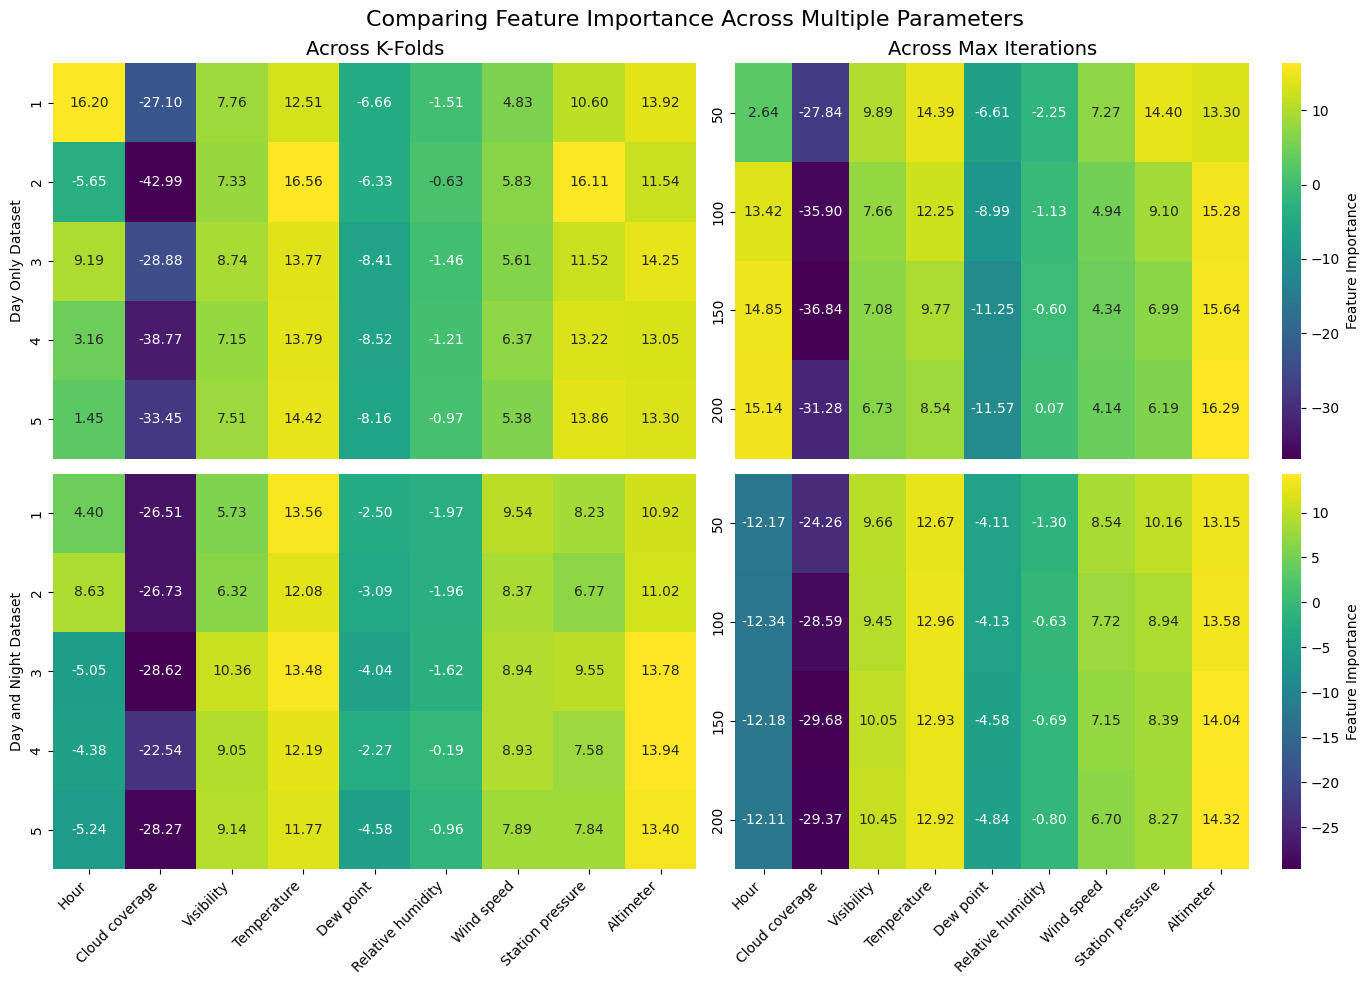

In [31]:
def plot_heatmap(ax, data, xticklabels, yticklabels, title, xlabel=True, ylabel=True, show_colorbar=True):
    sns.heatmap(data, annot=True, cmap='viridis', xticklabels=xticklabels, yticklabels=yticklabels, fmt='.2f', cbar=show_colorbar, cbar_kws={'label': 'Feature Importance'}, ax=ax)
    ax.set_title(title, fontsize=14)
    
    if not xlabel:
        ax.set_xlabel('')
    if not ylabel:
        ax.set_ylabel('')
    
    ax.set_xticklabels([] if not xlabel else ax.get_xticklabels(), rotation=45, ha='right')

# Create subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 10))

# Day Only Dataset - K-Folds
plot_heatmap(axes[0, 0], feature_importance_day_only, [], range(1, 6), 'Across K-Folds', xlabel=False, show_colorbar=False)
axes[0, 0].set_ylabel('Day Only Dataset')

# Day Only Dataset - Max Iterations
plot_heatmap(axes[0, 1], feature_importance_matrix_day_only, [], max_iter_lst, 'Across Max Iterations', xlabel=False, ylabel=False, show_colorbar=True)

# Day and Night Dataset - K-Folds
plot_heatmap(axes[1, 0], feature_importance_day_night, feature_names_day_night, range(1, 6), title=None, ylabel=False, show_colorbar=False)
axes[1, 0].set_ylabel('Day and Night Dataset')

# Day and Night Dataset - Max Iterations
plot_heatmap(axes[1, 1], feature_importance_matrix_day_night, feature_names_day_night, max_iter_lst, title=None, ylabel=False, show_colorbar=True)

plt.suptitle('Comparing Feature Importance Across Multiple Parameters', fontsize=16)
plt.tight_layout()
plt.savefig(os.path.join(save_dir, f'super_heatmap.png'))
plt.show()
